In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
data1 = fits.open('ECscr04144_1d.fits')[0].data
data2 = fits.open('ECscr04145_1d.fits')[0].data
data3 = fits.open('ECscr04146_1d.fits')[0].data

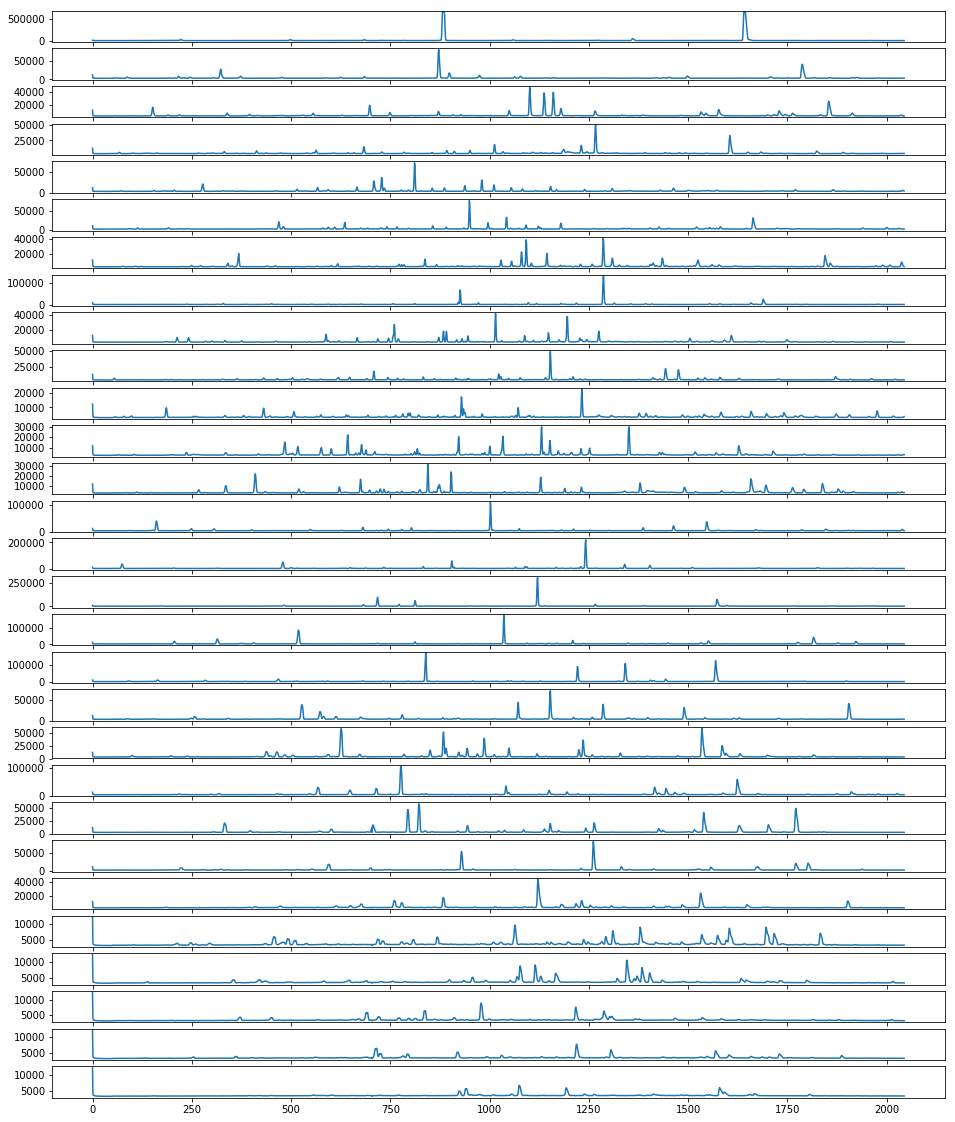

In [3]:
fig, axes = plt.subplots(ncols=1,nrows=len(data1),figsize=[16,20])
for i in range(len(data1)):
    axes[i].plot(range(2045),data1[i])

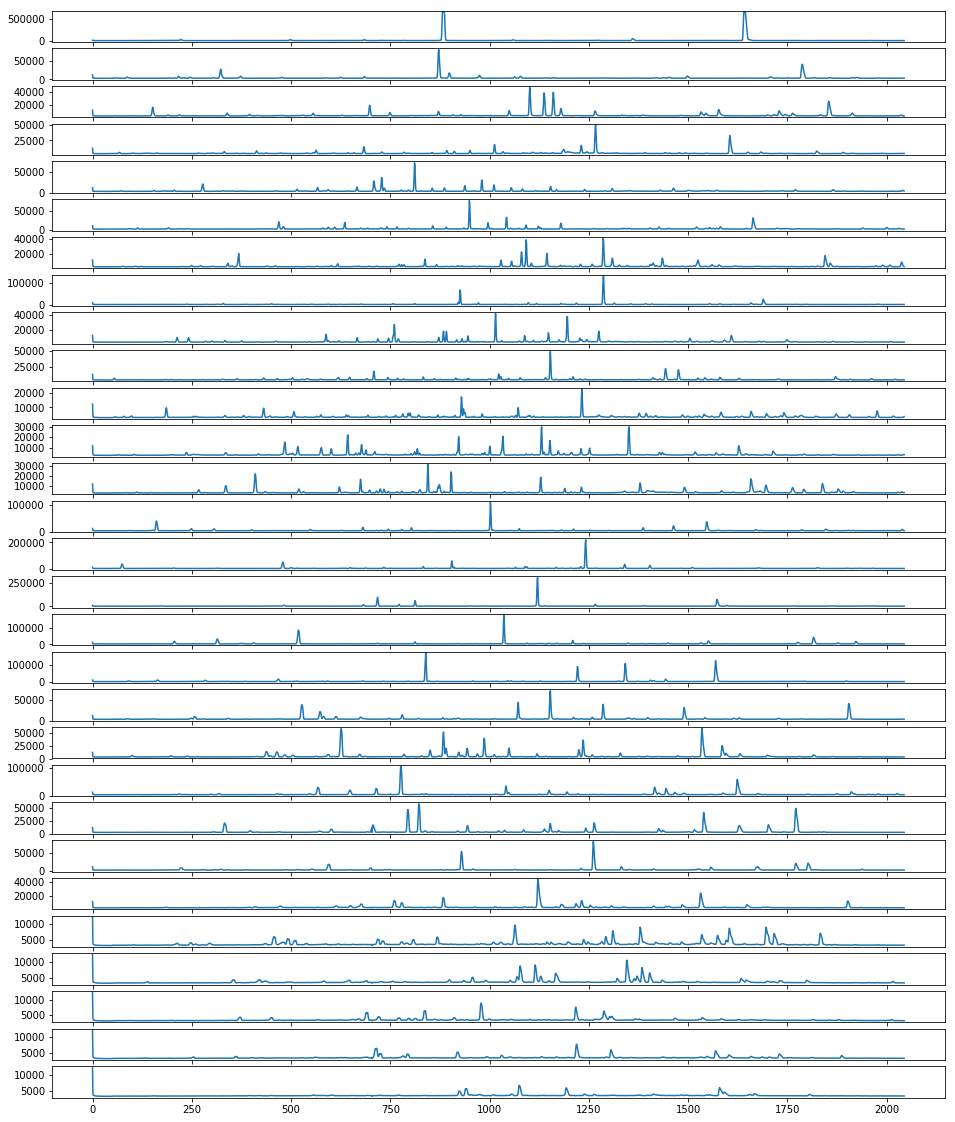

In [4]:
fig, axes = plt.subplots(ncols=1,nrows=len(data1),figsize=[16,20])
for i in range(len(data2)):
    axes[i].plot(range(2045),data1[i])

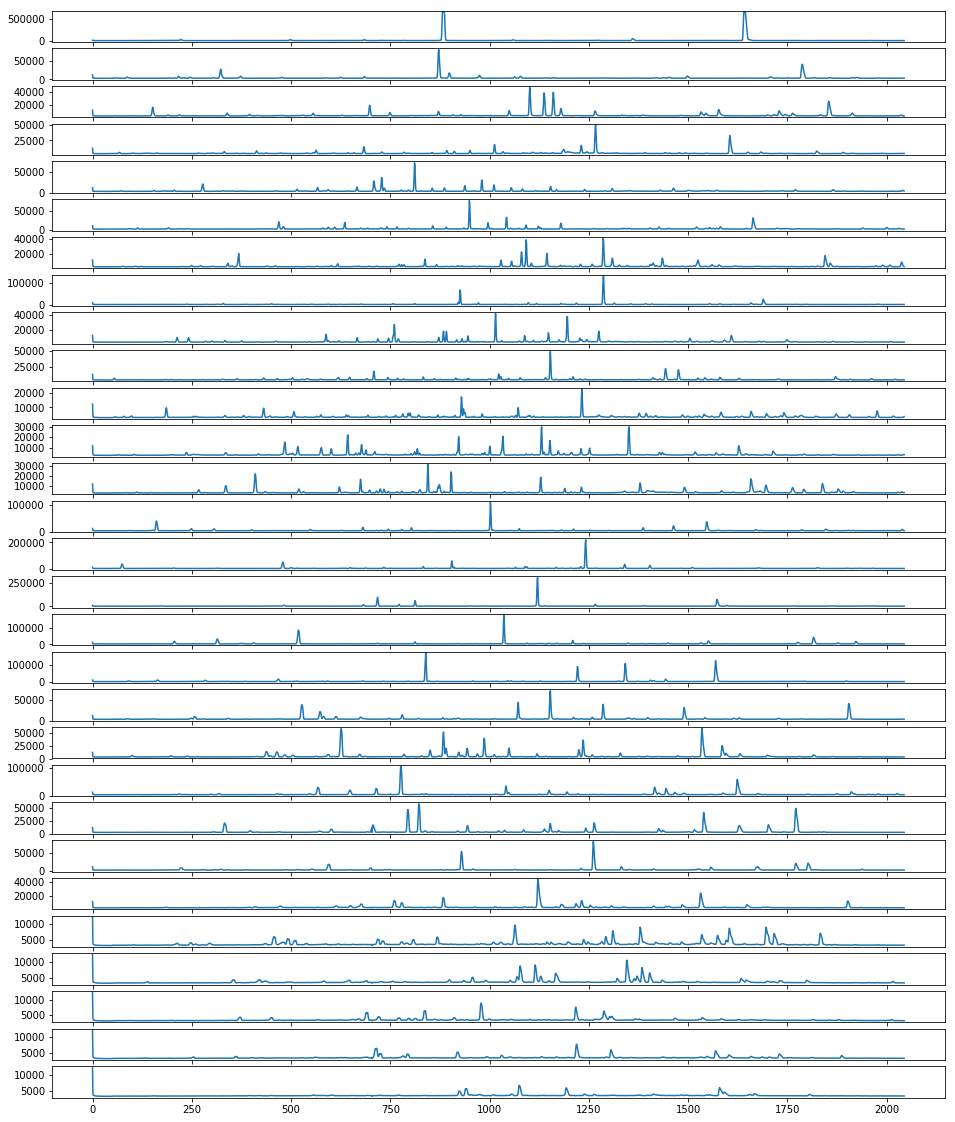

In [5]:
fig, axes = plt.subplots(ncols=1,nrows=len(data1),figsize=[16,20])
for i in range(len(data3)):
    axes[i].plot(range(2045),data1[i])

In [6]:
# hdu1 = fits.open('ECscr04144_1d.fits')
# hdu1.info()

In [7]:
# Gaussian
def fct_Gauss(x,esp,sig):
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-0.5*(x-esp)**2/sig**2)

# Simulator spectrograph
def simulator(wavelength,resolution,flux):
    n = len(wavelength)
    dLam = wavelength / resolution
    sig_g = dLam / np.sqrt(8*np.log(2))
    g = np.zeros(n)
    for i in range(n):
        g += flux[i] * fct_Gauss(wavelength,wavelength[i],sig_g[i])
    return g

In [8]:
# data1 = fits.open('ECscr04144_1d.fits')
# data1.info()
# data1[0].header

In [9]:
data1w = fits.open('ECscr04144_w.fits')
data2w = fits.open('ECscr04145_w.fits')
data3w = fits.open('ECscr04146_w.fits')

In [10]:
wave_string = ''
for i in range(1,34):
    wave_string += data1w[0].header['WAT2_{:03d}'.format(i)]
 
wave_string = wave_string.replace('wtype=multispec ', '')
wave_string

wave_str = wave_string.split('=')
wave_str[11] = wave_str[11][:4] + ' ' + wave_str[11][4:] # manual correct
#wave_str[11]

wav_left = []
for i in range(1,len(wave_str)):
    wave_str[i] = wave_str[i].split(' ')
    wav_left.append(float(wave_str[i][4]))
# wav_left[10] = wave_str[11][3]      # manual correct
# wav_left

wav_right = []
for i in range(1,len(wav_left)+1):
    wav_right.append(float(wave_str[i][5])*float(wave_str[i][6]) + float(wav_left[i-1]))
# wav_right

wav_range = []
for i in range(len(wav_left)):
    wav_range.append([wav_left[i],wav_right[i]])
    
    # np.linspace(wav_left[i],wav_right[i],2045)

#len(wav_range)
#len(wav_left)
#len(wav_right)
wav_range

[[6842.4805256256, 7123.235522080435],
 [6635.1962366135, 6907.362342898045],
 [6440.1051410726, 6704.187586020411],
 [6256.1621081341, 6512.62281525014],
 [6082.438132581, 6331.700531744801],
 [5918.104642193, 6160.557831131718],
 [5762.420282878, 5998.422641077163],
 [5614.7197368613, 5844.602076153691],
 [5474.4042181453, 5698.472539476274],
 [5340.933358879, 5559.471272880815],
 [5213.8182548157, 5427.089114218326],
 [5092.6154811741, 5300.864265261199],
 [4976.9219245161, 5180.376909438399],
 [4866.3703037096, 5065.24454720775],
 [4760.6252751121, 4955.117939856715],
 [4659.3800349656, 4849.677571116403],
 [4562.3533464918, 4748.6305510735365],
 [4469.2869310169, 4651.7078991956505],
 [4379.9431721611, 4558.662153392988],
 [4294.1030901231, 4469.265260366823],
 [4211.564549702, 4383.306709380181],
 [4132.1406711835, 4300.5918772986115],
 [4055.6584177954, 4220.940557516447],
 [3981.9573372577, 4144.1856493626465],
 [3910.8884381678, 4070.1719879286484],
 [3842.31318466, 3998.75529

In [11]:
R = np.linspace(4000,5000,2045)
# for i in range(len(wav_left)):
#     wavelength = np.linspace(wav_range[i][0],wav_range[i][1],2045)
#     simulator(wavelength,R,data1)

wavelength = np.linspace(float(wav_range[0][0]),wav_range[0][1],2045)
output = simulator(wavelength,R,data1[0])
output = output * np.trapz(data1[0],wavelength) / np.trapz(output,wavelength)

plt.figure(figsize=[16,9])
plt.plot(wavelength,data1[0],'--',alpha=0.5,label="input signal")
plt.plot(wavelength,output,label="output signal")
plt.title("Outpus signal at linear increasing resolution (R=[4000,5000])")
plt.xlabel('wavelength ($\AA$)')
plt.legend()
plt.grid(True)
plt.show()

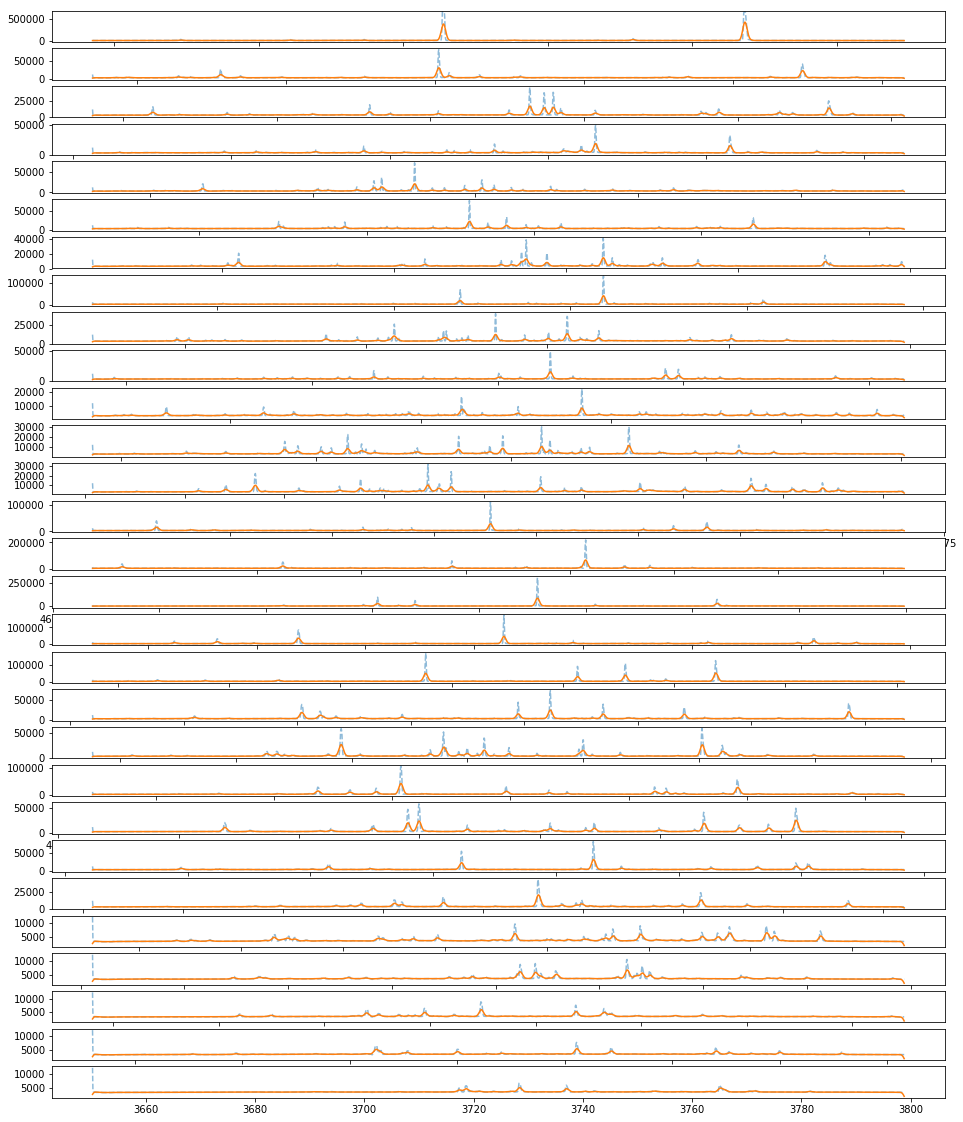

In [14]:
wavelength = []
for i in range(len(wav_range)):
    wavelength.append(np.linspace(float(wav_range[i][0]),wav_range[i][1],2045))
output = []
for i in range(len(data1)):
    res = simulator(wavelength[i],R,data1[i]) 
    res = res * np.trapz(data1[i],wavelength[i]) / np.trapz(res,wavelength[i])
    output.append(res)
fig, axes = plt.subplots(ncols=1,nrows=len(data1),figsize=[16,20])
for i in range(len(data1)):
    axes[i].plot(wavelength[i],data1[i],'--',alpha=0.5)
    axes[i].plot(wavelength[i],output[i])

In [15]:
### Find the real resolution of SoXS according to wavelength range ###
N_pas = 100000
### wavelength range ### (\AA)
u = np.linspace(3500.0,4400.0,N_pas)
g = np.linspace(4270.0,5450.0,N_pas)
r = np.linspace(5220.0,6800.0,N_pas)
i = np.linspace(6560.0,8500.0,N_pas)

In [16]:
### read csv files ###
import csv
import pandas
df = pandas.read_csv('soxs_resolution.csv')
print(df)

    conf    wave        R
0      1  0.3500  4060.57
1      1  0.3576  4148.74
2      1  0.3650  4234.59
3      1  0.3723  4319.29
4      1  0.3794  4401.66
5      1  0.3863  4481.71
6      1  0.3931  4560.60
7      1  0.3996  4636.01
8      1  0.4060  4710.26
9      1  0.4122  4782.19
10     1  0.4182  4851.80
11     1  0.4240  4919.09
12     1  0.4295  4982.90
13     1  0.4349  5045.55
14     1  0.4400  5104.72
15     2  0.4270  3889.48
16     2  0.4369  3979.65
17     2  0.4466  4068.01
18     2  0.4562  4155.45
19     2  0.4656  4241.08
20     2  0.4747  4323.97
21     2  0.4837  4405.95
22     2  0.4924  4485.19
23     2  0.5010  4563.53
24     2  0.5093  4639.13
25     2  0.5173  4712.01
26     2  0.5251  4783.05
27     2  0.5327  4852.28
28     2  0.5400  4918.78
29     2  0.5470  4982.54
30     3  0.5275  3837.77
31     3  0.5400  3928.72
32     3  0.5524  4018.93
33     3  0.5645  4106.96
34     3  0.5763  4192.81
35     3  0.5879  4277.21
36     3  0.5993  4360.15
37     3  0.

In [59]:
import csv

# open the file in universal line ending mode 
with open('soxs_resolution.csv') as infile:
  # read the file as a dictionary for each row ({header : value})
  reader = csv.DictReader(infile)
  data = {}
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
conf = data['conf']
wave = data['wave']
R = data['R']

conf = [float(i) for i in conf]
wave = [float(i)*10000 for i in wave]
R = [float(i) for i in R]

import pandas
#colnames = ["#","conf", "wave", "R"]
data = pandas.read_csv('soxs_resolution.csv', names=colnames)
conf = data.conf.tolist()
wave = data.wave.tolist()
R = data.R.tolist()

In [60]:
size = 15
con = [conf[i:i+size] for i  in range(0, len(conf), size)]
wav = [wave[i:i+size] for i  in range(0, len(wave), size)]
R = [R[i:i+size] for i  in range(0, len(R), size)]

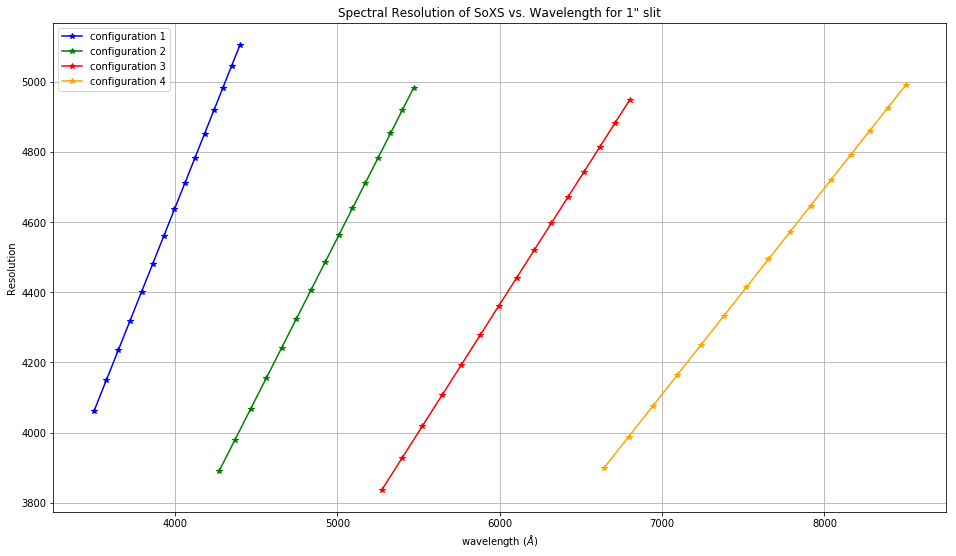

In [61]:
plt.figure(figsize=[16,9])
plt.title("Spectral Resolution of SoXS vs. Wavelength for 1\" slit")
colors = ['b','g','r','orange']
for i in range(4):
    x = np.asarray(wav[i],dtype=np.float32)
    y = np.asarray(R[i],dtype=np.float32)
    plt.plot(x,y,'-*',label="configuration {:d}".format(int(con[i][0])),c=colors[i])
plt.xlabel('wavelength ($\AA$)')
plt.ylabel('Resolution')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
len(wavelength)

2045

In [26]:
### use real resolution ###
wavelength = np.linspace(float(wav_range[0][0]),wav_range[0][1],2045)

In [70]:
print(wavelength)
print(wavelength[0])
print(wavelength[-1])

np.where(wavelength>=wav[3][0])
np.where(wavelength<=wav[3][-1])

[6842.48052563 6842.6178813  6842.75523697 ... 7122.96081073 7123.09816641
 7123.23552208]
6842.4805256256
7123.235522080435


(array([   0,    1,    2, ..., 2042, 2043, 2044]),)

In [71]:
for i in range(len(con)):
    if (np.where(wavelength)>=wav[i][0])==(np.where(wavelength<=wav[i][-1])):
        reso = R[i]
    elif i<=2:
        a=np.where(wavelength>=wav[i+1][0])[0]
        b=np.where(wavelength<=wav[i][-1])[0]
        overlap = set(a).intersection(b)
        index_sp = list(overlap)[-1]
        
    
    

(array([   0,    1,    2, ..., 2042, 2043, 2044]),)

In [88]:
wave_x = np.linspace(4060,4747,2045)
a=np.where(wave_x>=wav[1][0])[0]
b=np.where(wave_x<=wav[0][-1])[0]
overlap = set(a).intersection(b)
index_sp = list(overlap)[-1]

1011

In [ ]:
output = simulator(wavelength,R,data1[0])
output = output * np.trapz(data1[0],wavelength) / np.trapz(output,wavelength)

plt.figure(figsize=[16,9])
plt.plot(wavelength,data1[0],'--',alpha=0.5,label="input signal")
plt.plot(wavelength,output,label="output signal")
plt.title("Outpus signal at linear increasing resolution (R=[4000,5000])")
plt.xlabel('wavelength ($\AA$)')
plt.legend()
plt.grid(True)
plt.show()